# ML Tutorial Day 11

## Support Vector Machine

While performing classification, there are many ways to draw the boundary

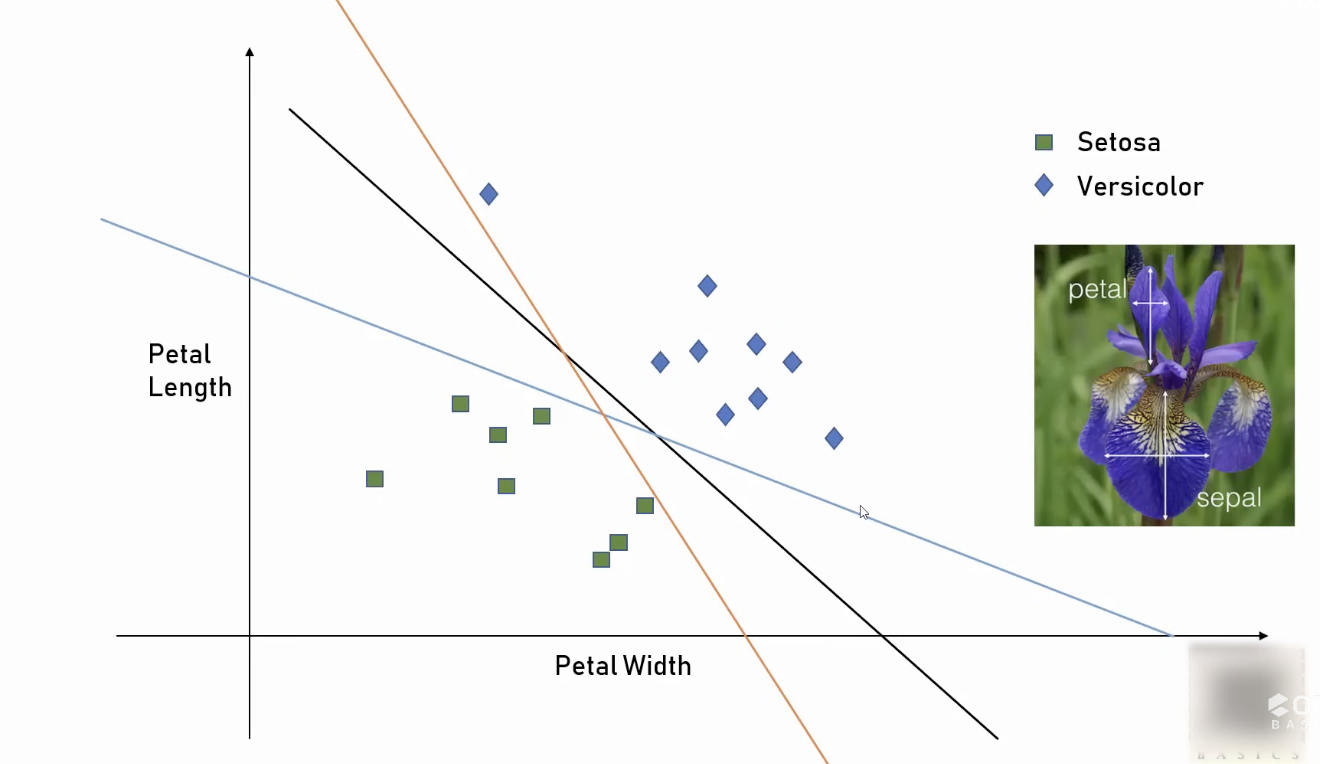

But how can we decide which boundary is the best?

We can find the distance of the nearby points from the boundary which is called the margin and the boundary with the highest margin is the best because it has the most room for additional datapoints that can be classified with it.

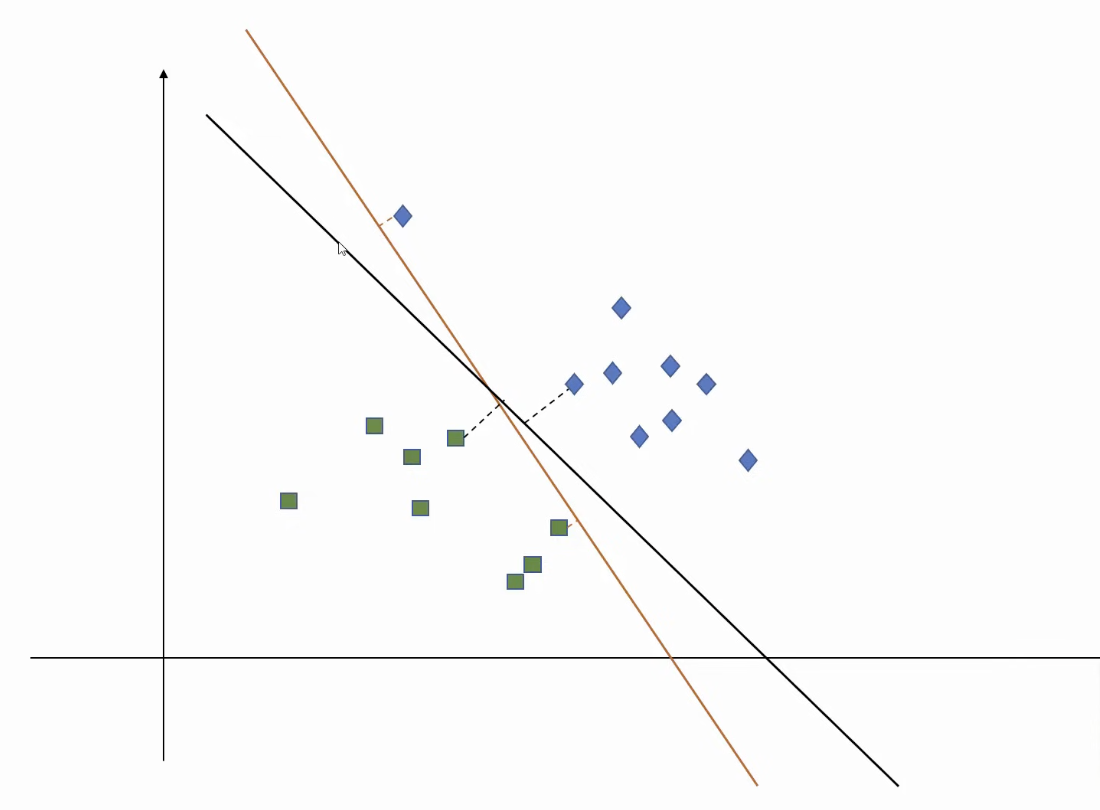

In the above example, if there is a blue datapoint on the upper area between the two lines, the black line classify it better compared to the yellow line, thus the black boundary is better.

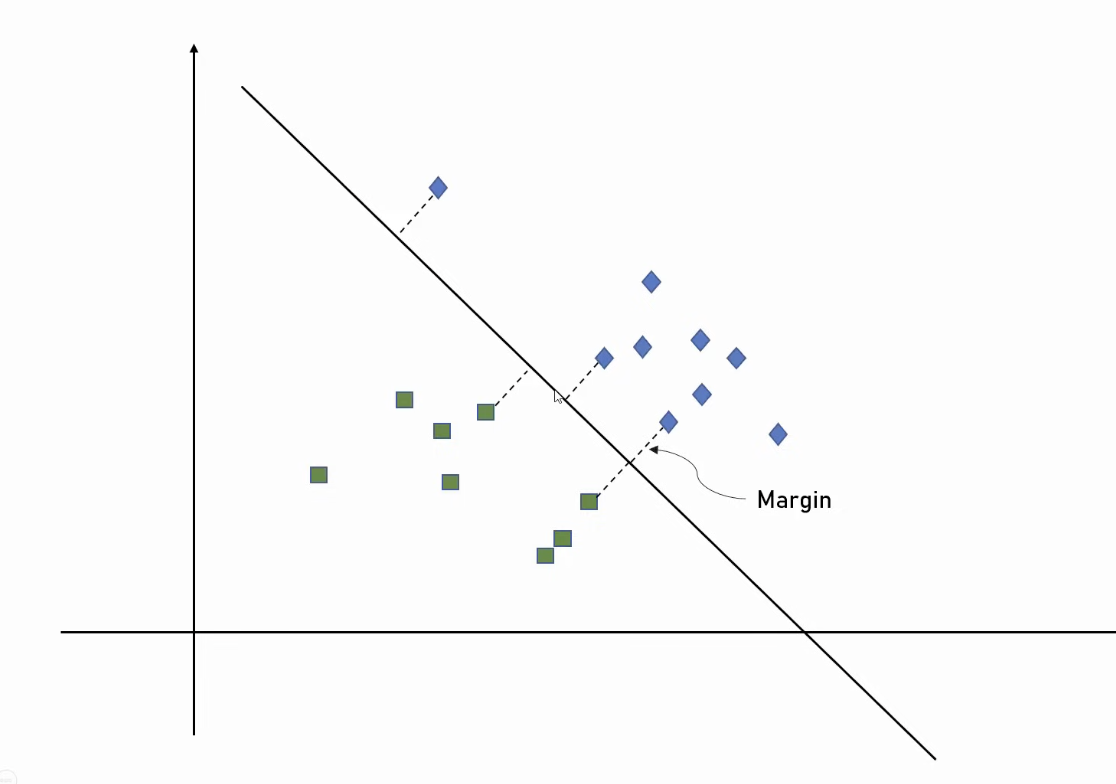

Finding the boundary with the maximum margin is the endgoal of support vector machine. The nearby points are called the support vectors.

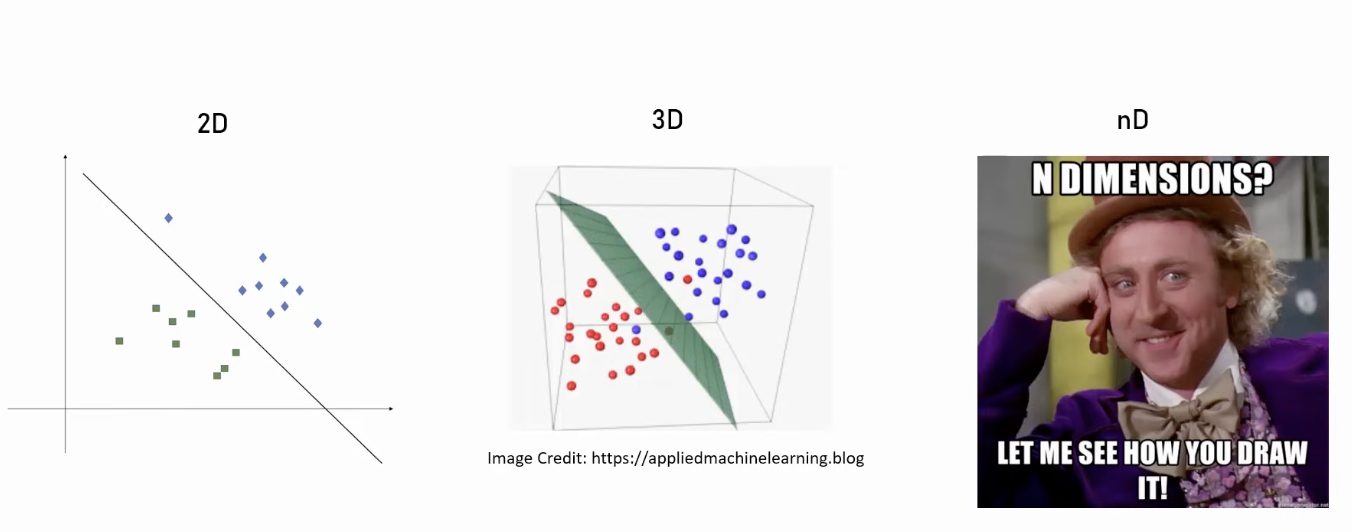

In 2D, the decision boundary is a line, in 3D it is a plane and in nD it is a hyperplane.

So SVM tries to draw a hyperplane in nD such that is maximizes the margin between classification groups.

## Gamma
Gamma is the distance of points from the decision boundary. In the first example, we are considering only those points which are closer to the decision boundary, which gives us a high gamma which might overfit the model. While in the other case, we have lower gamma but our model is not overfitted.

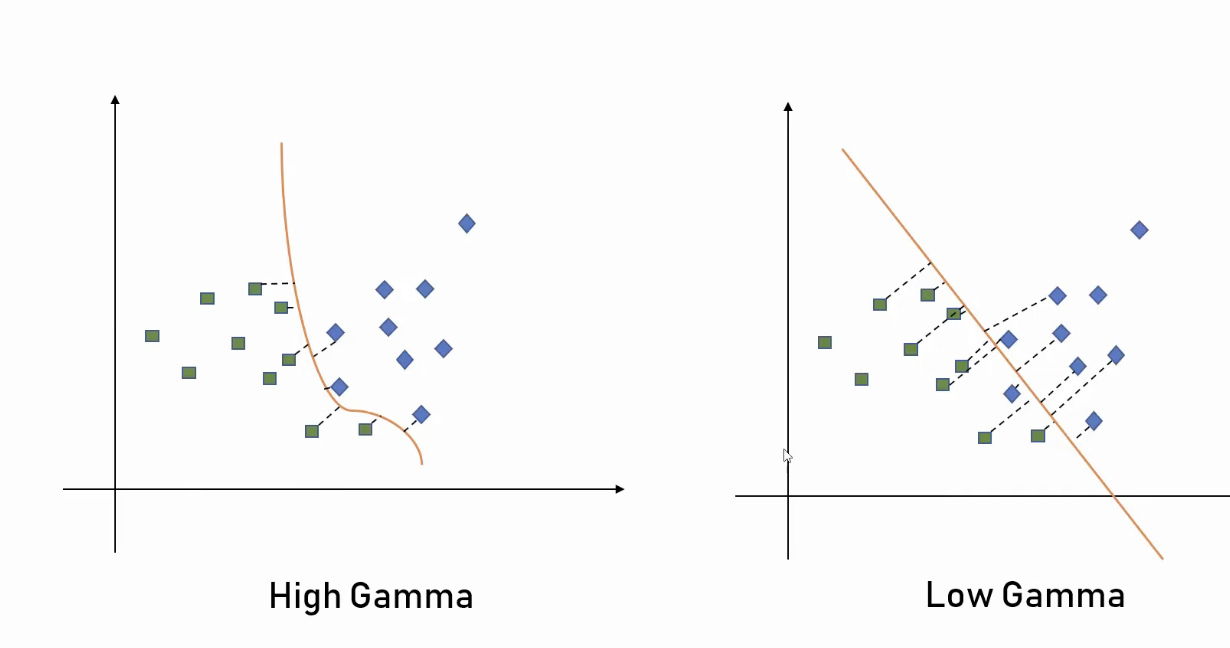

## Regularization
This means that the decision boundary is able to segregate the data effectively, albeit having high regularization can lead to model overfitting.

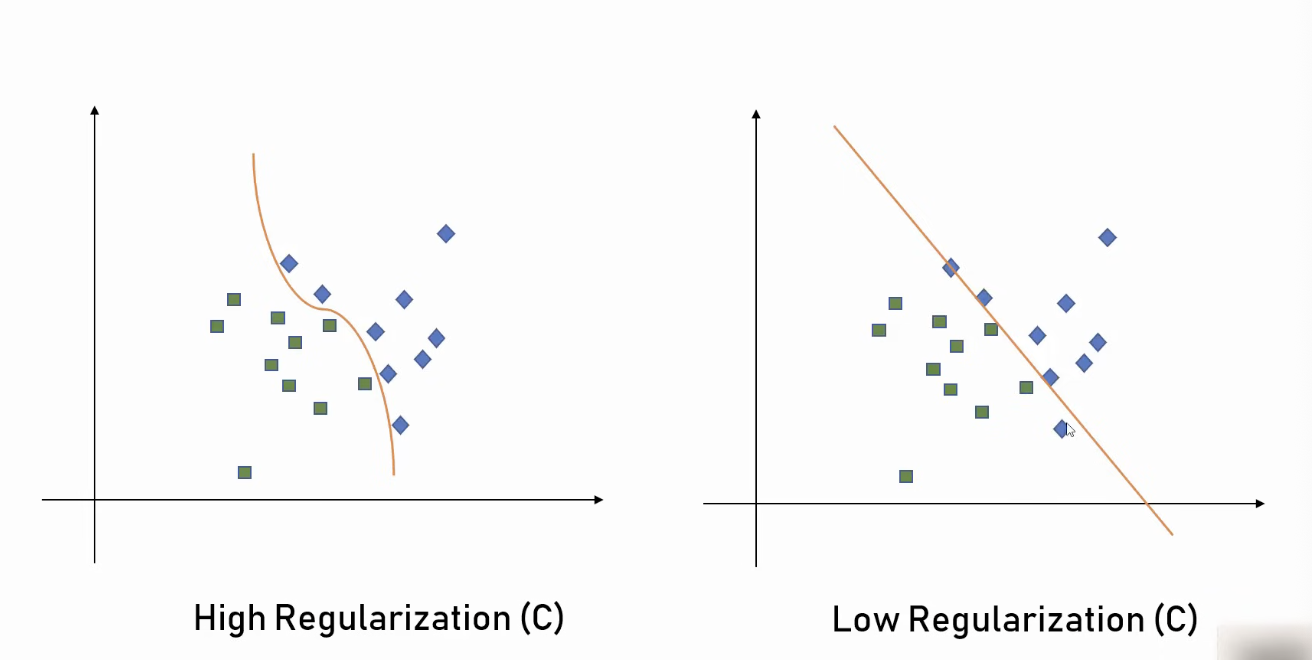

## Kernel
Suppose our initial data looks something like this and we want to create a decision boundary to separate the data.

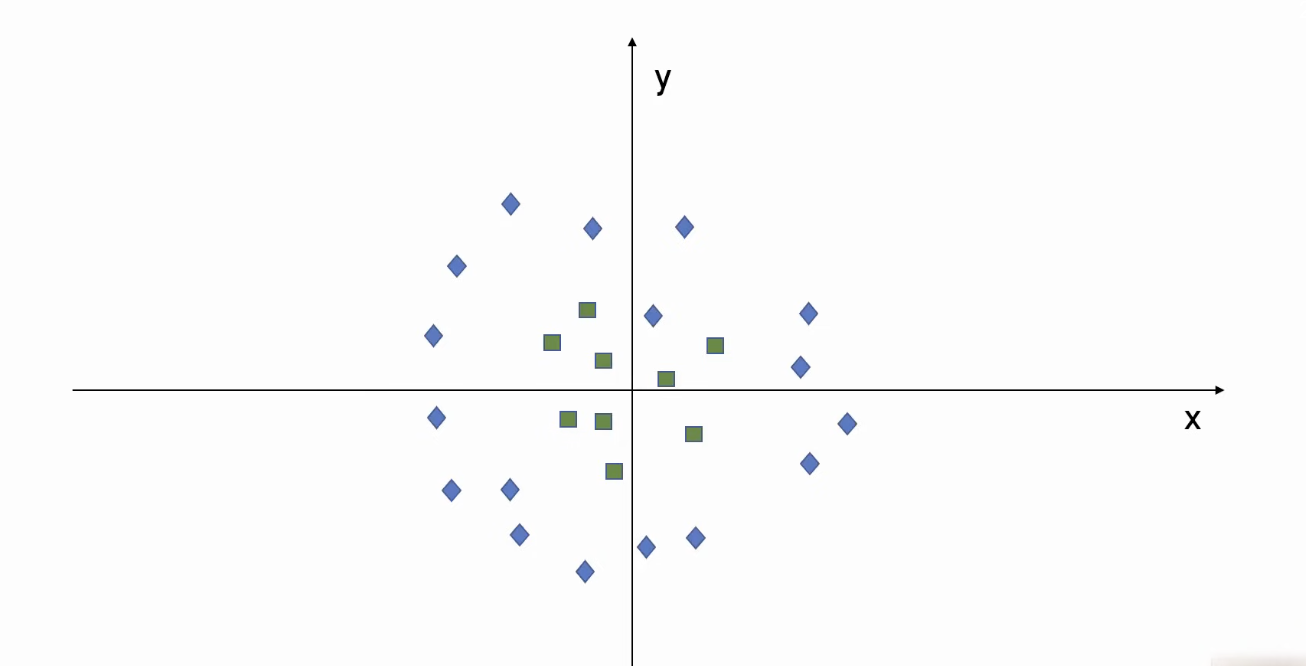

We can introduce some kind of transformation to the data and add additional feature to facilitate in creating the boundary. The transformation here is known as the kernel.

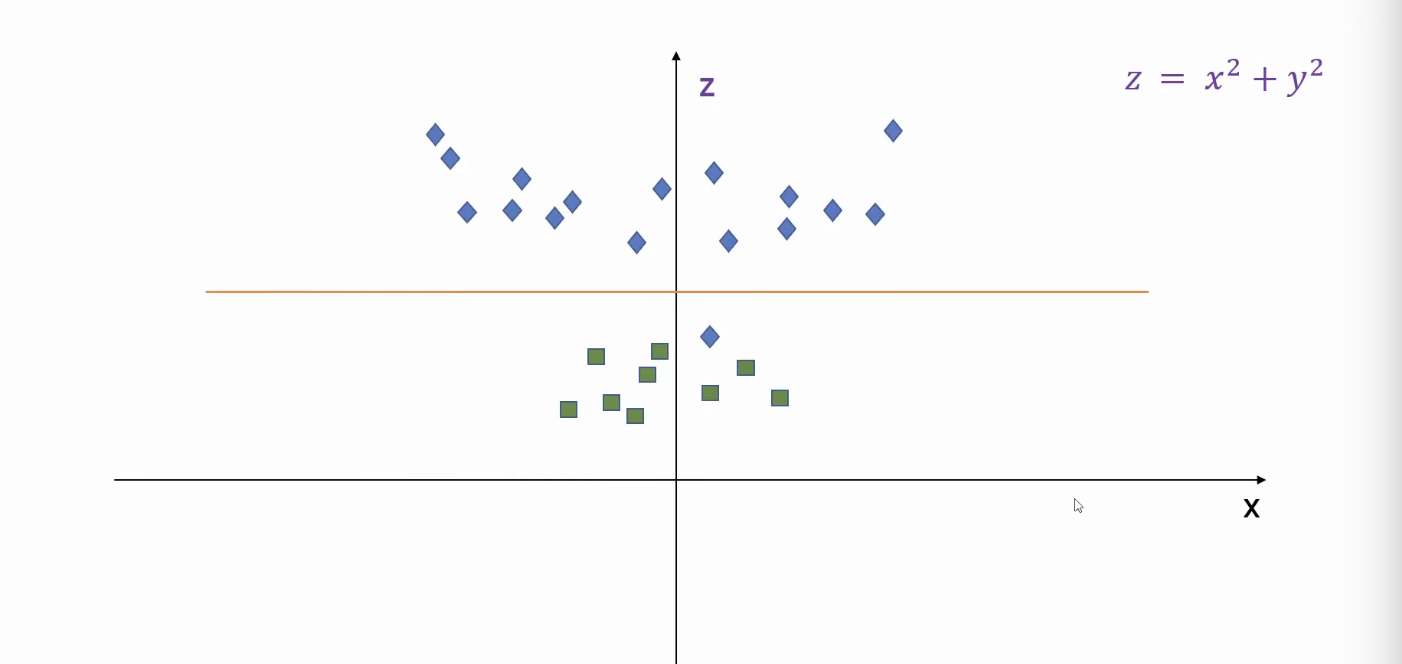

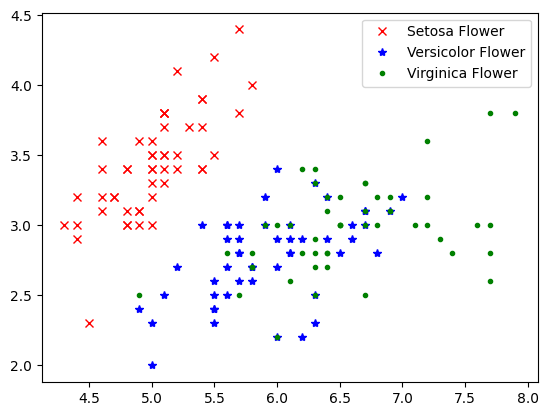

In [96]:
# importing relevant libraries

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# importing the data
iris = load_iris()

length = [float(iris.data[i][0]) for i in range(len(iris.data))]
width = [float(iris.data[i][1]) for i in range(len(iris.data))]
tar = [int(iris.target[i]) for i in range(len(iris.target))]

# visualising the data
df = pd.DataFrame([length, width, tar]).T
df.columns = ['Length', 'Width', 'Target']
plt.plot(df[df['Target'] == 0]['Length'], df[df['Target'] == 0]['Width'], 'rx', label = 'Setosa Flower')
plt.plot(df[df['Target'] == 1]['Length'], df[df['Target'] == 1]['Width'], 'b*', label = 'Versicolor Flower')
plt.plot(df[df['Target'] == 2]['Length'], df[df['Target'] == 2]['Width'], 'g.', label = 'Virginica Flower')
plt.legend()
plt.show()


In [97]:
# name of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [98]:
# creating the dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# adding the target and flower_name column
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

# understanding target names
iris.target_names

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


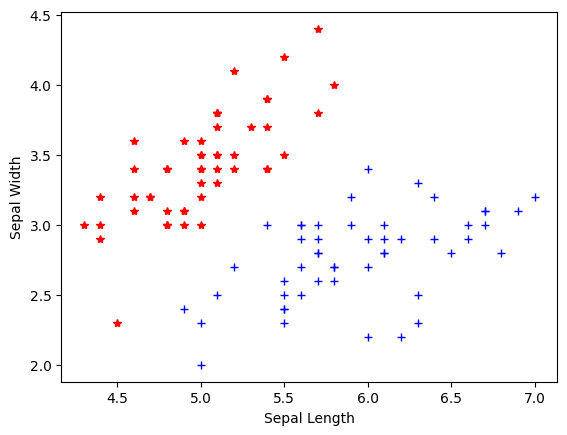

In [99]:
# visualising the data
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

# visualising sepal properties
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(df0['sepal length (cm)'], df0['sepal width (cm)'], 'r*')
plt.plot(df1['sepal length (cm)'], df1['sepal width (cm)'], 'b+')
plt.show()

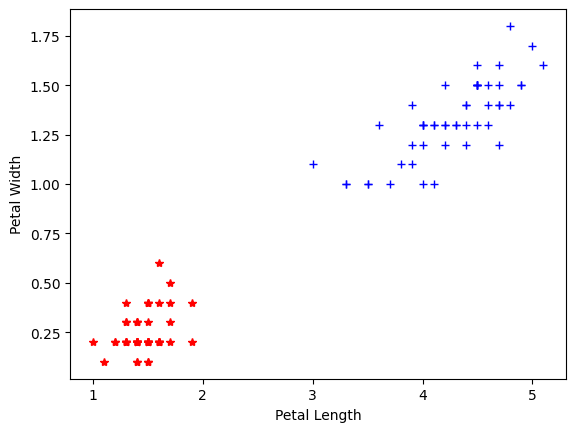

In [100]:
# visualising petal properties
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.plot(df0['petal length (cm)'], df0['petal width (cm)'], 'r*')
plt.plot(df1['petal length (cm)'], df1['petal width (cm)'], 'b+')
plt.show()

Now we will use SVM to create the decision boundary.

In [101]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [105]:
from sklearn.model_selection import train_test_split as tts

# preparing data for training
X = df.drop(['target', 'flower_name'], axis = 1)
y = df['target']

# test_train split
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

63     1
144    2
4      0
149    2
139    2
      ..
120    2
73     1
37     0
114    2
46     0
Name: target, Length: 120, dtype: int64

In [106]:
# training the model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
# checking the accuracy of the model
model.score(X_test, y_test)

0.9666666666666667